In [2]:
from pathlib import Path
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fp = Path('D:/Development/Data/datasets/txt/names.txt')
names = open(fp, 'r').read().splitlines()

In [4]:
letters = sorted(list(set(''.join(names))))
letters.insert(0, '.')
n_letters = len(letters)

In [5]:
stoi = {c:i for c,i in zip(letters, range(n_letters))}
itos = {i:c for i,c in zip(range(n_letters), letters)}

In [6]:
bigram_counts = np.zeros((n_letters, n_letters), dtype=np.int32)

for name in names:
    s = '.' + name + '.'
    for a,b in zip(s, s[1:]):
        idx_a, idx_b = stoi[a], stoi[b]
        bigram_counts[idx_a, idx_b] += 1

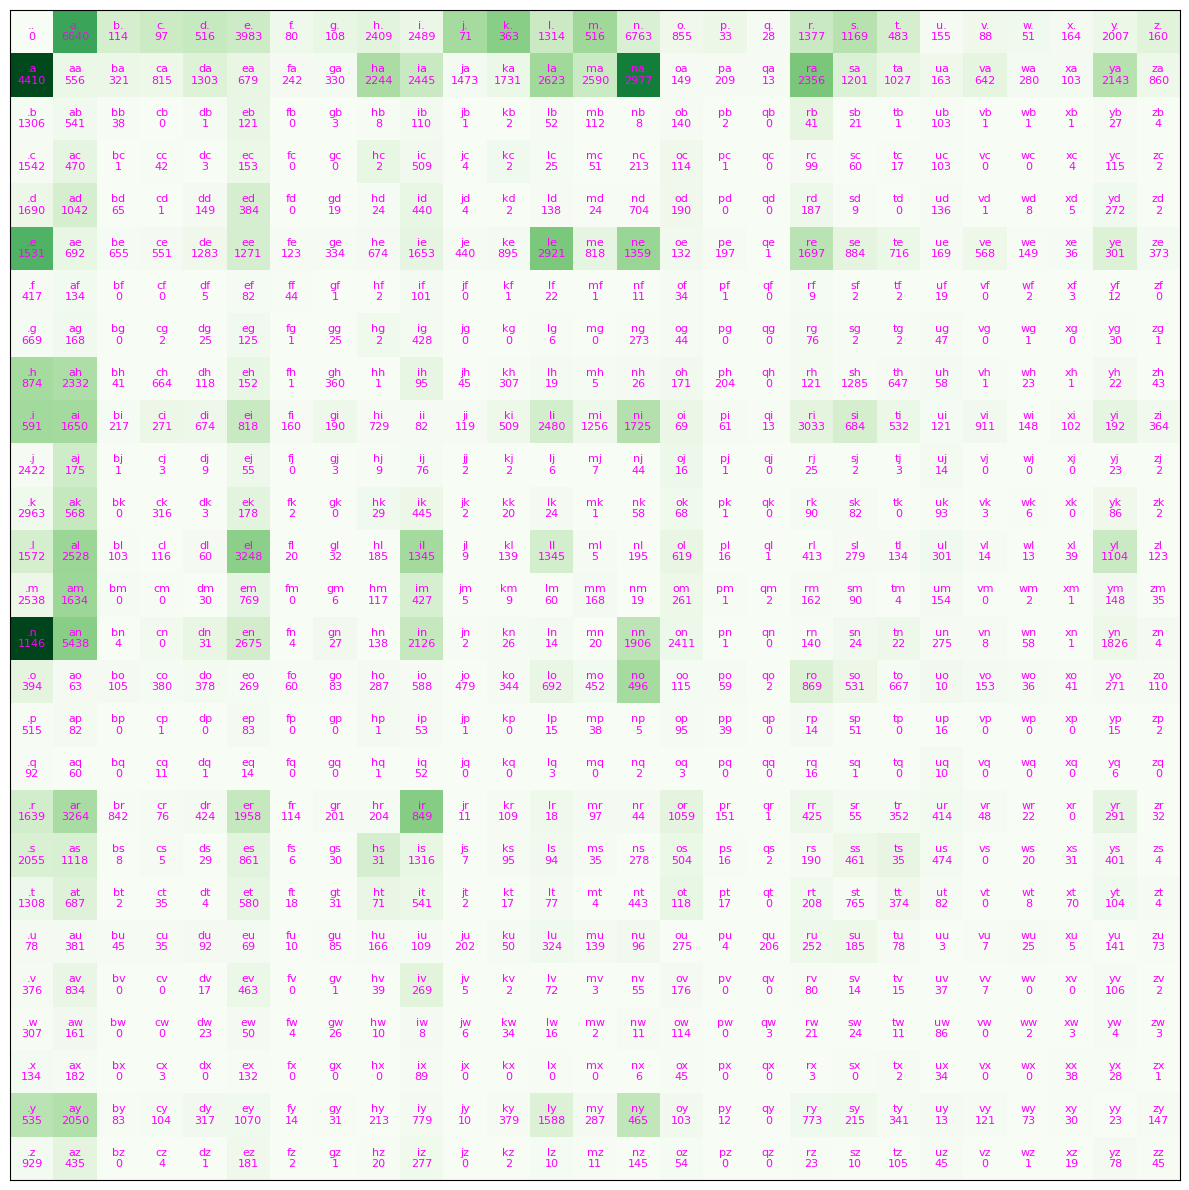

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(12)
fig.set_dpi(100)

ax.set_xticks([])
ax.set_yticks([])

ax.imshow(bigram_counts, cmap='Greens')

for i in range(n_letters):
    for j in range(n_letters):
        txt = f"{itos[i]}{itos[j]}\n{bigram_counts[i, j]}"
        plt.text(i, j, txt, ha='center', va='center', size=8, c='magenta')

plt.tight_layout()
plt.show()

In [26]:
bigram_probs = 1 + bigram_counts.astype(np.float32, copy=True)
bigram_probs /= bigram_probs.sum(axis=1, keepdims=True)

In [9]:
def generate_name():
    idx = 0
    name = ''
    while True:
        probs = bigram_probs[idx]
        idx = np.random.choice(n_letters, 1, True, probs)[0]
        if idx == 0:
            break
        name += itos[idx]
    return name

In [10]:
np.random.seed(42)
for i in range(10):
    print(generate_name())

huria
atin
yn
cahakan
eigoffi
la
wyn
ana
k
tan


In [36]:
n = 0.0
nll = 0.0

for name in names:
    s = '.' + name + '.'
    for a,b in zip(s, s[1:]):
        idx_a, idx_b = stoi[a], stoi[b]
        nll += np.log(bigram_probs[idx_a, idx_b])
        n += 1

nll = -nll/n
print(f"{nll=}")

nll=np.float32(2.4543562)


In [11]:
def onehot(n, i):
    vector = np.zeros(n)
    vector[i] = 1.0
    return vector

def softmax(x):
    y = np.exp(x)
    return y/np.sum(y)

def cross_entroy(p, q):
    return -np.sum(p*np.log(q))

def loss(P, Q):
    return np.mean(np.array([cross_entroy(p,q) for p,q in zip(P,Q)]))

In [12]:
bigrams = []

for name in names:
    s = '.' + name + '.'
    for a,b in zip(s, s[1:]):
        idx_a, idx_b = stoi[a], stoi[b]
        bigrams.append((idx_a, idx_b))

In [13]:
X = np.array([onehot(n_letters, t[0]) for t in bigrams])
Y = np.array([onehot(n_letters, t[1]) for t in bigrams])

In [14]:
W = np.random.uniform(-1/sqrt(n_letters), 1/sqrt(n_letters), (n_letters, n_letters))

In [15]:
lr = 1.0
n_epoch = 2
batch_size = 64
n_batches = len(X) // batch_size

print(loss(Y, np.array([softmax(W@x) for x in X])))

for _ in range(n_epoch):
    idxs = np.random.permutation(len(X))
    batches = np.array_split(idxs, n_batches)

    for batch in batches:
        dW = np.zeros_like(W)

        for x,y in zip(X[batch], Y[batch]):
            y_hat = softmax(W @ x)
            dW += np.outer(y_hat-y, x)

        W -= lr * dW/batch_size

    print(loss(Y, np.array([softmax(W@x) for x in X])))

3.3041536505116085
2.4808471904627867
2.4683990956826833


In [16]:
def generate_name_2():
    idx = 0
    name = ''
    while True:
        probs = softmax(W @ onehot(n_letters, idx))
        idx = np.random.choice(n_letters, 1, True, probs)[0]
        if idx == 0:
            break
        name += itos[idx]
    return name

In [17]:
np.random.seed(42)
for i in range(10):
    print(generate_name_2())

huria
atin
yn
caghaen
eifqlim
la
wyn
ana
javan
ke


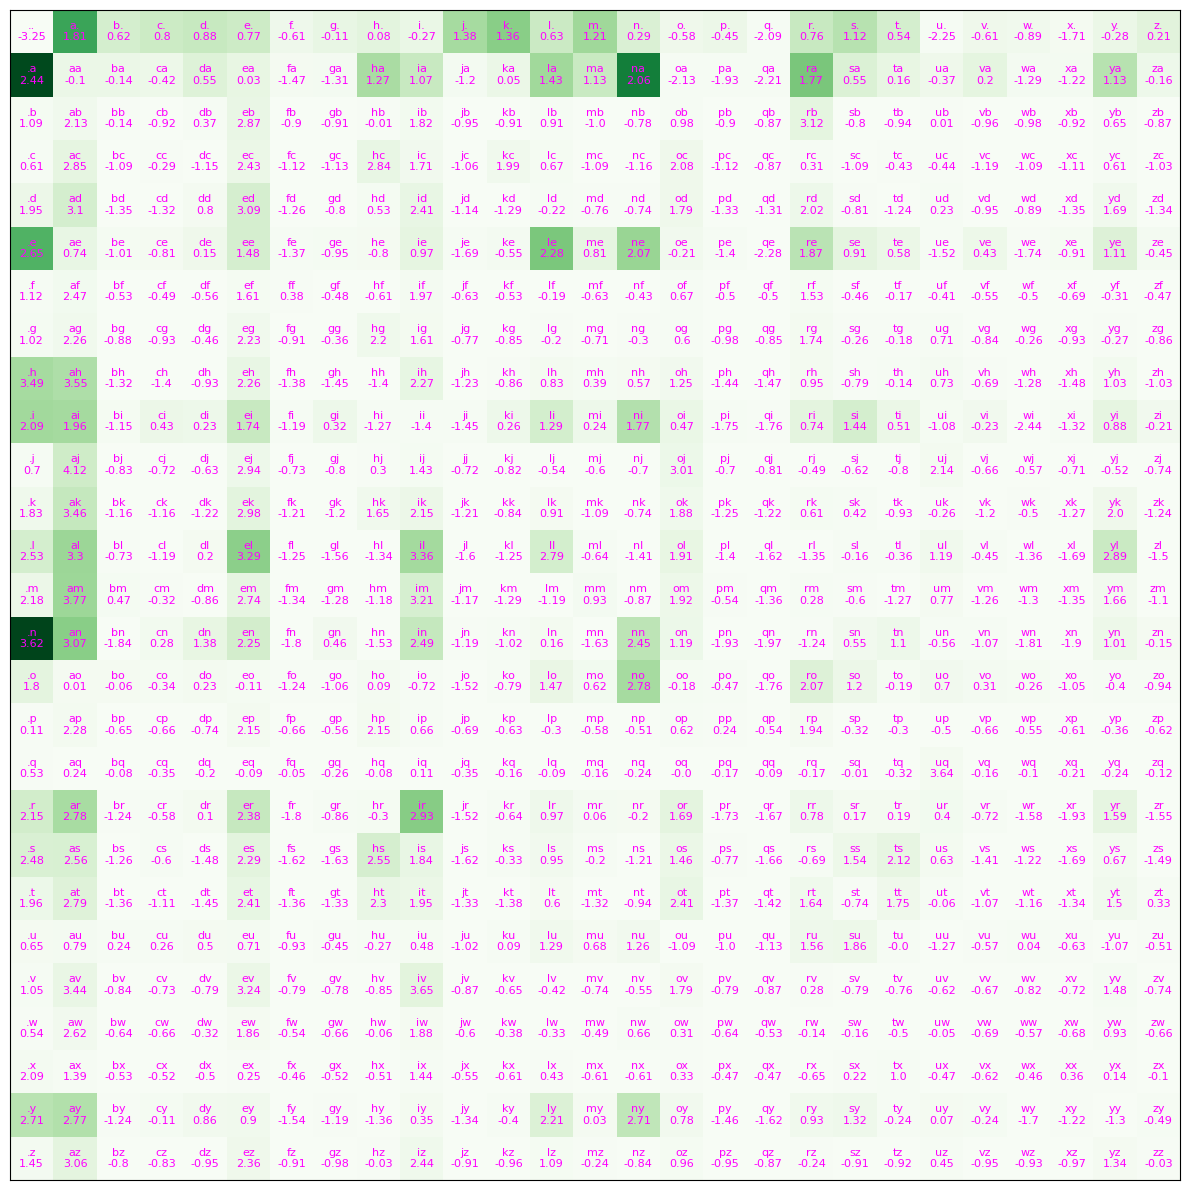

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(12)
fig.set_dpi(100)

ax.set_xticks([])
ax.set_yticks([])

ax.imshow(bigram_counts, cmap='Greens')

for i in range(n_letters):
    for j in range(n_letters):
        txt = f"{itos[i]}{itos[j]}\n{round(float(W[i,j]),2)}"
        plt.text(i, j, txt, ha='center', va='center', size=8, c='magenta')

plt.tight_layout()
plt.show()